# 프로젝트 설명

In [1]:
import sys
sys.path.append('..')

from src.utility import *
from src import graph

ModuleNotFoundError: No module named 'utility'

In [2]:
sys.path

['c:\\Project\\dual_attention',
 'c:\\Users\\SEOKYOUNG\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\SEOKYOUNG\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\python39.zip',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\DLLs',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3',
 '',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\SEOKYOUNG\\Documents\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\SEOKYOUNG\\.ipython',
 '..']

In [9]:
import os
os.getcwd()

os.chdir('..')
os.getcwd()


'c:\\Project'

In [ ]:

project_name = "dual_attention"
createfolder("./data")
createfolder("./model")
createfolder("./result")
createfolder("./graph")

data_path = "./data"
model_path = "./model"
result_path = "./result"
graph_path = "./graph"

# Data load

## Raw data

In [ ]:
raw_data = loadfile(data_path, "raw data", 'csv')
display(raw_data.describe())
display(raw_data.info())

csv file is loaded from ./data/raw data.csv


,Month,Day,Hour,Minute,FT-3061-2,TT-3061-1,TT-3061-2,PT-3061-2,FT-3061-4,TT-3061-5,TT-3061-3,TT-3061-4,TT-3061-6,PT-3061-3 (old),LT-3061-2,FT-3061-3,FT-3062-1
count,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000
mean,11.139795,15.541977,11.477318,29.499648,29.559141,29.222028,25.539743,-0.430313,22.591501,30.624912,48.269577,66.736512,63.175855,-0.329969,28.591552,56.274025,24.231841
std,0.681425,8.967264,6.931991,17.318402,35.428486,21.361876,17.809541,0.475763,26.384841,22.120893,39.597746,55.663624,51.600359,0.375344,30.572621,62.235262,31.711250
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,5.000000,14.000000,0.000000,8.000000,7.100000,-0.960000,0.000000,6.800000,7.000000,8.700000,8.900000,-0.720000,0.000000,0.000000,0.000000
50%,11.000000,15.000000,11.000000,29.000000,0.800000,17.600000,25.000000,-0.013000,0.000000,40.600000,38.500000,62.000000,60.600000,-0.015000,24.200000,0.000000,24.600000
75%,12.000000,24.000000,17.000000,44.000000,65.700000,52.600000,42.100000,-0.001000,48.600000,45.800000,88.700000,126.600000,118.900000,-0.004000,52.800000,123.200000,42.600000
max,12.000000,31.000000,23.000000,59.000000,200.000000,57.200000,108.800000,0.214000,225.400000,113.500000,126.700000,137.700000,128.700000,0.459000,100.000000,300.000000,1092.100000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83701 entries, 0 to 83700
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            83701 non-null  int64  
 1   Day              83701 non-null  int64  
 2   Hour             83701 non-null  int64  
 3   Minute           83701 non-null  int64  
 4   FT-3061-2        83701 non-null  float64
 5   TT-3061-1        83701 non-null  float64
 6   TT-3061-2        83701 non-null  float64
 7   PT-3061-2        83701 non-null  float64
 8   FT-3061-4        83701 non-null  float64
 9   TT-3061-5        83701 non-null  float64
 10  TT-3061-3        83701 non-null  float64
 11  TT-3061-4        83701 non-null  float64
 12  TT-3061-6        83701 non-null  float64
 13  PT-3061-3 (old)  83701 non-null  float64
 14  LT-3061-2        83701 non-null  float64
 15  FT-3061-3        83701 non-null  float64
 16  FT-3062-1        83701 non-null  float64
dtypes: float64(1

None

FileNotFoundError: [Errno 2] No such file or directory: './graph/violin/rawdata_FT-3061-2_(6, 6)_300dpi.png'

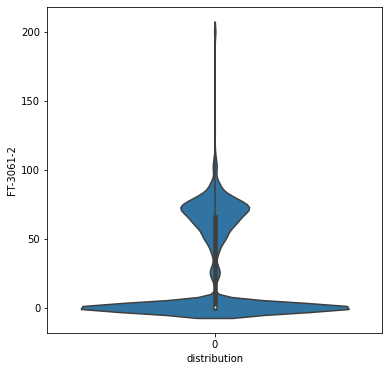

In [ ]:
plot_var = raw_data.columns[4:]
graph.violin(df=raw_data, plot_var=plot_var, figname='rawdata')

## Data analysis

In [8]:
sum = 0
for i in range(num_data):
    print(f"Series {i+1}: {data_list[i].shape}")
    sum += len(data_list[i])
    
print(f"Total number of data: {sum}")

Series 1: (843, 14)
Series 2: (1959, 14)
Series 3: (575, 14)
Series 4: (569, 14)
Series 5: (863, 14)
Series 6: (742, 14)
Series 7: (2414, 14)
Series 8: (645, 14)
Series 9: (927, 14)
Series 10: (980, 14)
Series 11: (2425, 14)
Series 12: (857, 14)
Series 13: (517, 14)
Series 14: (638, 14)
Total number of data: 14954


In [9]:
data_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FT-3061-2  843 non-null    float64
 1   FT-3061-3  843 non-null    float64
 2   FT-3061-4  843 non-null    float64
 3   FT-3062-1  843 non-null    float64
 4   TT-3061-1  843 non-null    float64
 5   PT-3061-2  843 non-null    float64
 6   TT-3061-2  843 non-null    float64
 7   LT-3062-1  843 non-null    float64
 8   TT-3061-4  843 non-null    float64
 9   TT-3061-6  843 non-null    float64
 10  PT-3061-3  843 non-null    float64
 11  TT-3061-3  843 non-null    float64
 12  TT-3061-5  843 non-null    float64
 13  LT-3061-2  843 non-null    float64
dtypes: float64(14)
memory usage: 92.3 KB


In [10]:
data_list[0].describe()

,FT-3061-2,FT-3061-3,FT-3061-4,FT-3062-1,TT-3061-1,PT-3061-2,TT-3061-2,LT-3062-1,TT-3061-4,TT-3061-6,PT-3061-3,TT-3061-3,TT-3061-5,LT-3061-2
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,66.631501,115.696069,45.523176,40.923389,51.853239,-0.959493,41.378565,29.015488,121.956926,114.102031,-0.783211,84.305516,42.360885,41.659122
std,8.600889,2.437222,5.036386,6.272298,0.559134,0.000868,0.155463,0.645218,2.053312,1.668485,0.019893,1.725717,0.708202,10.023022
min,49.841917,110.153779,37.600000,25.262479,51.326837,-0.961135,41.050196,27.072900,117.100000,109.441035,-0.831101,80.070640,41.525176,27.984438
25%,62.776486,113.815243,41.971216,37.034912,51.443183,-0.960316,41.245471,28.488705,120.507010,114.261800,-0.788143,83.119591,41.872815,33.196159
50%,69.989736,115.471903,43.328756,39.402951,51.603292,-0.959460,41.401961,29.043290,122.069817,114.740411,-0.781250,84.221185,42.110989,39.475913
75%,72.232714,117.390341,48.526162,43.769661,52.214066,-0.958772,41.489596,29.616456,123.842088,114.921381,-0.768168,85.631964,42.747933,50.919665
max,77.324448,122.415228,54.570497,55.489132,53.063916,-0.957798,41.690921,30.227521,124.595467,115.824917,-0.757128,87.190709,45.905564,61.854325


# Data preparation

In [11]:
from src import rnn
import numpy as np

In [12]:
history_length  = 60
future_length   = 20
step            = 1

input_var  = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]

history_var = input_var + output_var
future_var  = output_var

history_series = []
future_series  = []

for i in range(num_data):
    history, future = rnn.data2series(data_list[i], history_length, history_var, future_length, future_var,
                                      step, start_index=0, end_index=None)
    if not i:
        history_series = history
        future_series  = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series  = np.concatenate([future_series, future],   axis=0)

In [13]:
print(f"history series: {history_series.shape}",
      f"future series: {future_series.shape}",
      sep='\n')

history series: (13834, 60, 7)
future series: (13834, 20, 3)
